<a href="https://colab.research.google.com/github/Satyake/Time-Series-Analysis-spagheti-code/blob/master/SARIMA_Weekly_Start_Exogenous_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df=pd.read_csv('/content/co2_mm_mlo.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
df['date']=pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [ ]:
df=df.set_index('date')

In [ ]:
df.head()
df.index.freq='MS'

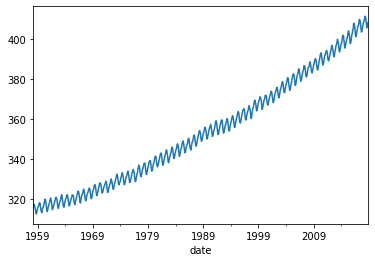

In [ ]:
df['interpolated'].plot()

In [ ]:
import matplotlib.pyplot as plt


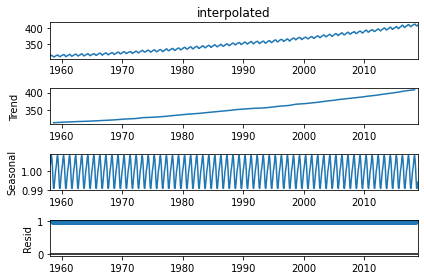

In [ ]:
result=seasonal_decompose(df['interpolated'],model='mul')
result.plot();

In [ ]:
result.se

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima,plot_acf

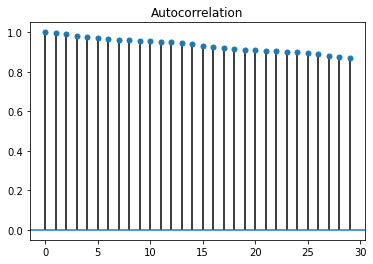

In [ ]:
plot_acf(df['interpolated'])

In [ ]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.252
Date:                            Thu, 12 Nov 2020   AIC                            424.505
Time:                                    19:20:52   BIC                            452.046
Sample:                                         0   HQIC                           435.132
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3510      0.083      4.212      0.000       0.188       0.514
ar.L2          0.0873      0.058      1.501      0.133      -0.027       0.201
ma.L1         -0.7060      0.088     -8.048      0.000      -0.878      -0.534
ar.S.L12       0.9996      0.000   2992.587      0.000       0.999       1.000
ma.S.L12      -0.8665      0.021    -40.618      0.000      -0.908      -0.825
sigma2         0.0956      0.005     20.438      0.000       0.086       0.105
===================================================================================
Ljung-Box (Q):                       43.76   Jarque-Bera (JB):                 4.47
Prob(Q):                              0.31   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model=SARIMAX(df['interpolated'],order=(2,1,1),seasonal_order=(1,0,1,12))

In [ ]:
train=df.iloc[:717]
test=df.iloc[717:]

In [ ]:
model=SARIMAX(train['interpolated'],order=(2,1,1),seasonal_order=(1,0,1,12))

In [ ]:
fitted_model=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
start=len(train)
end=len(train)+len(test)-1
results=fitted_model.predict(start=start,end=end,typ='levels')

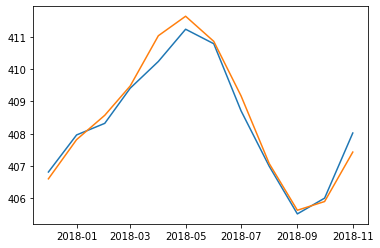

In [ ]:
plt.plot(test['interpolated'])
plt.plot(results)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error=rmse(test['interpolated'],results)

In [ ]:
error

0.35756143314487643

In [2]:
dfx=pd.read_csv('/content/RestaurantVisitors.csv',index_col='date',parse_dates=True)

In [3]:
dfx.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [6]:
dfx.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [4]:
dfx.dropna(inplace=True)

In [ ]:
dfx.columns

Index(['date', 'weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [ ]:
dfx.dtypes

date             object
weekday          object
holiday           int64
holiday_name     object
rest1           float64
rest2           float64
rest3           float64
rest4           float64
total           float64
dtype: object

In [ ]:
columns=['rest1', 'rest2', 'rest3','rest4', 'total']

for column in columns:
  dfx[column]=dfx[column].astype(int)

In [ ]:
dfx.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


In [ ]:
dfx.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            468, 469, 470, 471, 472, 473, 474, 475, 476, 477],
           dtype='int64', length=478)

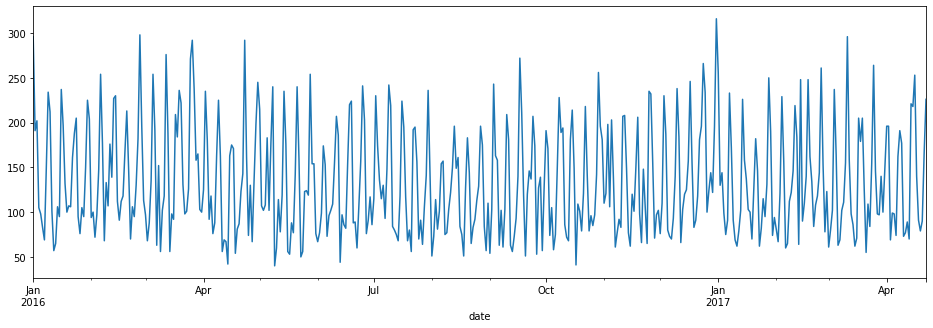

In [9]:
dfx['total'].plot(figsize=(16,5))

In [17]:
! pip install pmdarima

     |████████████████████████████████| 1.5MB 9.1MB/s 
     |████████████████████████████████| 808kB 25.1MB/s 
     |████████████████████████████████| 2.1MB 37.9MB/s 
     |████████████████████████████████| 8.7MB 46.1MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 50.3.2
    Uninstalling setuptools-50.3.2:
      Successfully uninstalled setuptools-50.3.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
result=seasonal_decompose(dfx['total'],model='add')

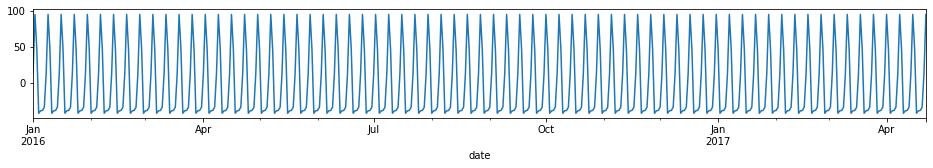

In [7]:
result.seasonal.plot(figsize=(16,2))

In [8]:
train=dfx.iloc[:436]
test=dfx.iloc[436:]

In [9]:
from pmdarima import auto_arima

In [29]:
auto_arima(dfx['total'],seasonal=True,m=7).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2387.926
Date:                   Sat, 14 Nov 2020   AIC                           4783.852
Time:                           05:26:00   BIC                           4800.531
Sample:                                0   HQIC                          4790.409
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.0699      2.102      2.887      0.004       1.949      10.191
ar.S.L7        0.9534      0.016     60.039      0.000       0.922       0.985
ma.S.L7       -0.7315      0.056    -13.101      0.000      -0.841      -0.622
sigma2      1357.6408     88.981     15.258      0.000    1183.242    1532.040
===================================================================================
Ljung-Box (Q):                       73.59   Jarque-Bera (JB):                58.71
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.73
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
from sklearn.preprocessing import LabelEncoder

In [40]:
LE=LabelEncoder()

dfx[['holiday_name']]=LE.fit_transform(dfx['holiday_name'])

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [52]:
modelx=SARIMAX(train['total'],seasonal_order=(1,0,1,7),enforce_invertibility=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [53]:
fittedx=modelx.fit()

In [54]:
start=len(train)
end=len(train)+len(test)-1

In [55]:
results=fittedx.predict(start=start,end=end)

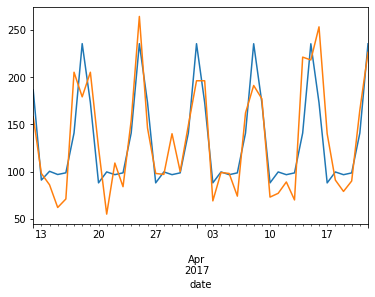

In [56]:
results.plot()
test['total'].plot()

In [57]:
rmse(test['total'],results)

31.9689499970175

In [42]:
auto_arima(dfx['total'],exogenous=dfx[['holiday_name']],seasonal=True,m=7).summary() #adding exogenous variable

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  478
Model:             SARIMAX(1, 0, 1)x(1, 0, [1, 2], 7)   Log Likelihood               -2299.473
Date:                                Sat, 14 Nov 2020   AIC                           4614.946
Time:                                        06:30:10   BIC                           4648.302
Sample:                                    01-01-2016   HQIC                          4628.060
                                         - 04-22-2017                                         
Covariance Type:                                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0598      0.063      0.945      0.345      -0.064       0.184
holiday_name    -4.4517      0.326    -13.645      0.000      -5.091      -3.812
ar.L1            0.7454      0.153      4.856      0.000       0.445       1.046
ma.L1           -0.6287      0.176     -3.574      0.000      -0.974      -0.284
ar.S.L7          0.9990      0.001   1245.425      0.000       0.997       1.001
ma.S.L7         -0.9817      0.056    -17.593      0.000      -1.091      -0.872
ma.S.L14         0.0478      0.054      0.877      0.380      -0.059       0.155
sigma2         856.3989     44.456     19.264      0.000     769.267     943.531
===================================================================================
Ljung-Box (Q):                       38.06   Jarque-Bera (JB):                65.64
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.53
Prob(H) (two-sided):                  0.60   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
modelx=SARIMAX(train['total'],order=(1,0,1),seasonal_order=(1,0,2,7),enforce_invertibility=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [45]:
fittedx=modelx.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [46]:
results=fittedx.predict(start=start,end=end)

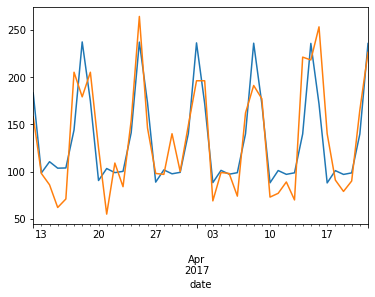

In [48]:
results.plot()
test['total'].plot()

In [49]:
from statsmodels.tools.eval_measures import rmse

In [51]:
rmse(test['total'],results)

32.50670868412119